In [ ]:

class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123,sampling=0):
        ''' Initialize les paramètres '''
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.sampling=sampling

    def initializ_centroids(self, X):
        ''' Selection des centroids de départ aléatoirement '''
        #np.random.RandomState(self.random_state)
        #random_idx = np.random.permutation(X.shape[0]) #le dataset est permuté
        #centroids = X[random_idx[:self.n_clusters]] # les n_clusters premiers clusters sont pris comme centroids
        centroids=X[:self.n_clusters]
        return centroids

    def compute_centroids(self, X, labels):
        ''' calcul des centroid des clusters '''
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def sample(self, X):
        #here we sample
        #random_idx = np.random.permutation(X.shape[0])
        #number_outputs=int((1-self.sampling)*X.shape[0])
        #sample = X[random_idx[:number_outputs]]
        sample=X
        return sample
    
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            X_sampled=self.sample(X)
            distance = self.compute_distance(X_sampled, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X_sampled, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        distance = self.compute_distance(X, self.centroids)
        self.labels = self.find_closest_cluster(distance)
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [107]:
%load_ext autoreload
%autoreload 2
from kmeans import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Import the data
df = pd.read_csv('./data/old_faithful.csv')

# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = Kmeans(n_clusters=2, max_iter=10000,sampling=0)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
228.28962523260364


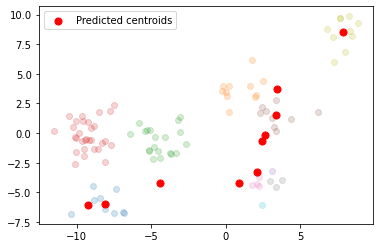

In [121]:
%load_ext autoreload
%autoreload 2
from kmeans import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs




def compute_centroids(n_clusters,X, y):
    ''' calcul des centroid des clusters '''
    centroids = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        centroids[k, :] = np.mean(X[y == k, :], axis=0)
    #centroids.sort(axis=0)
    return centroids

def score(predicted_centroids,real_centroids):
    predicted_centroids.sort(axis=0)
    real_centroids.sort(axis=0)
    sc=predicted_centroids-real_centroids
    sc*=sc
    return sc.sum()

n_clusters=10

#generation des données
X, y_true, real_centers = make_blobs(n_samples=100, centers=n_clusters,cluster_std=1, random_state=3,return_centers=True)

real_centroids=compute_centroids(n_clusters,X, y_true)


#execution du Kmeans
km = Kmeans(n_clusters=n_clusters, max_iter=100,sampling=0)
km.fit(X)

predicted_centroids = km.centroids

y_predict=km.predict(X)


sc=score(predicted_centroids,real_centroids)

print(sc)



#afficher les points de chaque cluster d'une couleur differente
for i in range(n_clusters):
    plt.scatter(X[y_predict == i, 0], X[y_predict == i, 1],alpha=0.2)



#afficher les centroids
plt.scatter(predicted_centroids[:, 0], predicted_centroids[:, 1], marker='o', s=50, c='r', label='Predicted centroids')
#plt.scatter(real_centroids[:, 0], real_centroids[:, 1], marker='*', s=50, c='black', label='Real centroids')
#plt.scatter(real_centers[:, 0], real_centers[:, 1], marker='x', s=50, c='b', label='Real center')

plt.legend()

# implementation de Sklearn

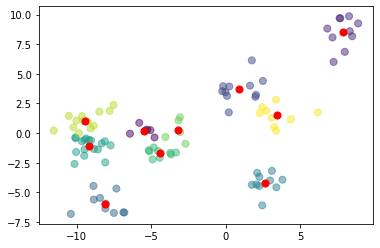

In [119]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

  
kmeans = KMeans(n_clusters=n_clusters).fit(X)
centroids_sklearn = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], c='red', s=50)
plt.show()

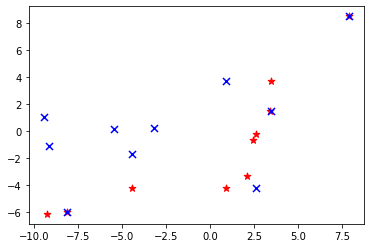

In [120]:
plt.scatter(predicted_centroids[:, 0], predicted_centroids[:, 1], marker='*', s=50, c='r', label='Sklearn centroid')
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='x', s=50, c='b', label='Predicted centroid')


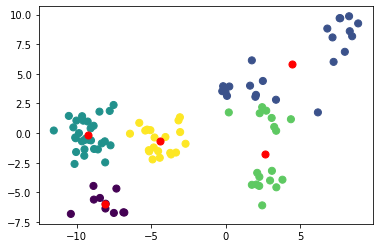

In [125]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
